In [3]:
# Import dependencies
import numpy as np
import pandas as pd
from scipy import stats
from matplotlib import pyplot as plt
import datetime as dt
import scipy.stats as stats

# San Francisco Crime Data Munging

In [5]:
# Use Pandas to read the SF crime data
sf_crime_data = pd.read_csv("csv_files/sf_crime_data_2015-2017.csv")
moon_data = pd.read_csv("csv_files/moonphasedata.csv")

In [6]:
# Double check sf crime data
sf_crime_data.head()

,IncidntNum,Category,Descript,DayOfWeek,Date,Time,PdDistrict,Resolution,Address,X,Y,Location,PdId
0,150060275,NON-CRIMINAL,LOST PROPERTY,Monday,1/19/2015,14:00,MISSION,NONE,18TH ST / VALENCIA ST,-122.421582,37.761701,"(37.7617007179518, -122.42158168137)",1.500000e+13
1,150098210,ROBBERY,"ROBBERY, BODILY FORCE",Sunday,2/1/2015,15:45,TENDERLOIN,NONE,300 Block of LEAVENWORTH ST,-122.414406,37.784191,"(37.7841907151119, -122.414406029855)",1.500000e+13
2,150098210,ASSAULT,AGGRAVATED ASSAULT WITH BODILY FORCE,Sunday,2/1/2015,15:45,TENDERLOIN,NONE,300 Block of LEAVENWORTH ST,-122.414406,37.784191,"(37.7841907151119, -122.414406029855)",1.500000e+13
3,150098210,SECONDARY CODES,DOMESTIC VIOLENCE,Sunday,2/1/2015,15:45,TENDERLOIN,NONE,300 Block of LEAVENWORTH ST,-122.414406,37.784191,"(37.7841907151119, -122.414406029855)",1.500000e+13
4,150098226,VANDALISM,"MALICIOUS MISCHIEF, VANDALISM OF VEHICLES",Tuesday,1/27/2015,19:00,NORTHERN,NONE,LOMBARD ST / LAGUNA ST,-122.431119,37.800469,"(37.8004687042875, -122.431118543788)",1.500000e+13


In [7]:
# Rename Full Date column
moon_data.rename(columns = {'Full Date':'Date'}, inplace = True)
moon_data.head()

,Year,Day,Month,Date,Percent Illumination,Moon Phase
0,2015,1,1,1/1/2015,84.00%,Waxing gibbous
1,2015,2,1,1/2/2015,91.00%,Waxing gibbous
2,2015,3,1,1/3/2015,96.00%,Waxing gibbous
3,2015,4,1,1/4/2015,99.00%,Waxing gibbous
4,2015,5,1,1/5/2015,100.00%,Full Moon


In [8]:
# Combine the data into a single dataset
sf_data_comp = pd.merge(sf_crime_data, moon_data, how="left", on = 'Date')
sf_data_comp.head()

,IncidntNum,Category,Descript,DayOfWeek,Date,Time,PdDistrict,Resolution,Address,X,Y,Location,PdId,Year,Day,Month,Percent Illumination,Moon Phase
0,150060275,NON-CRIMINAL,LOST PROPERTY,Monday,1/19/2015,14:00,MISSION,NONE,18TH ST / VALENCIA ST,-122.421582,37.761701,"(37.7617007179518, -122.42158168137)",1.500000e+13,2015,19,1,3.00%,Waning crescent
1,150098210,ROBBERY,"ROBBERY, BODILY FORCE",Sunday,2/1/2015,15:45,TENDERLOIN,NONE,300 Block of LEAVENWORTH ST,-122.414406,37.784191,"(37.7841907151119, -122.414406029855)",1.500000e+13,2015,1,2,93.00%,Waxing gibbous
2,150098210,ASSAULT,AGGRAVATED ASSAULT WITH BODILY FORCE,Sunday,2/1/2015,15:45,TENDERLOIN,NONE,300 Block of LEAVENWORTH ST,-122.414406,37.784191,"(37.7841907151119, -122.414406029855)",1.500000e+13,2015,1,2,93.00%,Waxing gibbous
3,150098210,SECONDARY CODES,DOMESTIC VIOLENCE,Sunday,2/1/2015,15:45,TENDERLOIN,NONE,300 Block of LEAVENWORTH ST,-122.414406,37.784191,"(37.7841907151119, -122.414406029855)",1.500000e+13,2015,1,2,93.00%,Waxing gibbous
4,150098226,VANDALISM,"MALICIOUS MISCHIEF, VANDALISM OF VEHICLES",Tuesday,1/27/2015,19:00,NORTHERN,NONE,LOMBARD ST / LAGUNA ST,-122.431119,37.800469,"(37.8004687042875, -122.431118543788)",1.500000e+13,2015,27,1,51.00%,First Quarter


In [9]:
# List of column names in dataframe
sf_data_comp.columns

Index(['IncidntNum', 'Category', 'Descript', 'DayOfWeek', 'Date', 'Time',
       'PdDistrict', 'Resolution', 'Address', 'X', 'Y', 'Location', 'PdId',
       'Year', 'Day', 'Month', 'Percent Illumination', 'Moon Phase'],
      dtype='object')

In [10]:
# Create new data frame
sf_data_clean = sf_data_comp

# Remove unwanted columns
sf_data_clean.drop(labels=['IncidntNum', 'Descript', 'DayOfWeek', 'Resolution', 'X', 'Y', 
                           'PdId', 'Year', 'Day', 'Month'], axis=1, inplace=True)
sf_data_clean

,Category,Date,Time,PdDistrict,Address,Location,Percent Illumination,Moon Phase
0,NON-CRIMINAL,1/19/2015,14:00,MISSION,18TH ST / VALENCIA ST,"(37.7617007179518, -122.42158168137)",3.00%,Waning crescent
1,ROBBERY,2/1/2015,15:45,TENDERLOIN,300 Block of LEAVENWORTH ST,"(37.7841907151119, -122.414406029855)",93.00%,Waxing gibbous
2,ASSAULT,2/1/2015,15:45,TENDERLOIN,300 Block of LEAVENWORTH ST,"(37.7841907151119, -122.414406029855)",93.00%,Waxing gibbous
3,SECONDARY CODES,2/1/2015,15:45,TENDERLOIN,300 Block of LEAVENWORTH ST,"(37.7841907151119, -122.414406029855)",93.00%,Waxing gibbous
4,VANDALISM,1/27/2015,19:00,NORTHERN,LOMBARD ST / LAGUNA ST,"(37.8004687042875, -122.431118543788)",51.00%,First Quarter
5,NON-CRIMINAL,2/1/2015,16:21,RICHMOND,400 Block of LOCUST ST,"(37.7870853907529, -122.451781767894)",93.00%,Waxing gibbous
6,SECONDARY CODES,1/31/2015,21:00,BAYVIEW,700 Block of KIRKWOOD AV,"(37.729203356539, -122.374019331833)",87.00%,Waxing gibbous
7,VANDALISM,1/31/2015,21:00,BAYVIEW,700 Block of KIRKWOOD AV,"(37.729203356539, -122.374019331833)",87.00%,Waxing gibbous
8,BURGLARY,1/31/2015,16:09,CENTRAL,200 Block of STOCKTON ST,"(37.7878092959561, -122.40656817787)",87.00%,Waxing gibbous
9,LARCENY/THEFT,1/31/2015,17:00,CENTRAL,800 Block of GEARY ST,"(37.7862578545865, -122.417295322526)",87.00%,Waxing gibbous


In [11]:
# Change date formatting
sf_data_clean['Date'] = sf_data_clean['Date'].apply(lambda x : dt.datetime.strptime(x, '%m/%d/%Y'))
sf_data_clean

,Category,Date,Time,PdDistrict,Address,Location,Percent Illumination,Moon Phase
0,NON-CRIMINAL,2015-01-19,14:00,MISSION,18TH ST / VALENCIA ST,"(37.7617007179518, -122.42158168137)",3.00%,Waning crescent
1,ROBBERY,2015-02-01,15:45,TENDERLOIN,300 Block of LEAVENWORTH ST,"(37.7841907151119, -122.414406029855)",93.00%,Waxing gibbous
2,ASSAULT,2015-02-01,15:45,TENDERLOIN,300 Block of LEAVENWORTH ST,"(37.7841907151119, -122.414406029855)",93.00%,Waxing gibbous
3,SECONDARY CODES,2015-02-01,15:45,TENDERLOIN,300 Block of LEAVENWORTH ST,"(37.7841907151119, -122.414406029855)",93.00%,Waxing gibbous
4,VANDALISM,2015-01-27,19:00,NORTHERN,LOMBARD ST / LAGUNA ST,"(37.8004687042875, -122.431118543788)",51.00%,First Quarter
5,NON-CRIMINAL,2015-02-01,16:21,RICHMOND,400 Block of LOCUST ST,"(37.7870853907529, -122.451781767894)",93.00%,Waxing gibbous
6,SECONDARY CODES,2015-01-31,21:00,BAYVIEW,700 Block of KIRKWOOD AV,"(37.729203356539, -122.374019331833)",87.00%,Waxing gibbous
7,VANDALISM,2015-01-31,21:00,BAYVIEW,700 Block of KIRKWOOD AV,"(37.729203356539, -122.374019331833)",87.00%,Waxing gibbous
8,BURGLARY,2015-01-31,16:09,CENTRAL,200 Block of STOCKTON ST,"(37.7878092959561, -122.40656817787)",87.00%,Waxing gibbous
9,LARCENY/THEFT,2015-01-31,17:00,CENTRAL,800 Block of GEARY ST,"(37.7862578545865, -122.417295322526)",87.00%,Waxing gibbous


In [12]:
# Create an overview table that summarizes necessary data: 

# Total crime by date
sf_crime_total = pd.DataFrame(sf_data_clean.Date.value_counts())

# Rename Date column to Total Crimes
sf_crime_total_rename = sf_crime_total.rename(columns={'Date': 'Total Crimes'})

# Add index title for Total Crime
sf_crime_total_rename.index.name = 'Date'

# Merge crime counts with previous total data frame
sf_totcrime = sf_data_clean.merge(sf_crime_total_rename, 
                                  how='outer', 
                                  on='Date').drop(['Time', 'PdDistrict', 'Address', 
                                                   'Category', 'Location', 'Moon Phase'], axis=1)

# Remove duplicate dates/condense
sf_totcrime_rm = sf_totcrime.drop_duplicates()

# Sort data frame by date
sf_sum_bydate = sf_totcrime_rm.sort_values(by='Date')

# Reset index values
sf_summary = sf_sum_bydate.reset_index(drop=True)

# Print the data
sf_summary


,Date,Percent Illumination,Total Crimes
0,2015-01-01,84.00%,553
1,2015-01-02,91.00%,433
2,2015-01-03,96.00%,444
3,2015-01-04,99.00%,335
4,2015-01-05,100.00%,459
5,2015-01-06,99.00%,417
6,2015-01-07,96.00%,397
7,2015-01-08,91.00%,394
8,2015-01-09,85.00%,509
9,2015-01-10,78.00%,424


In [13]:
# Changing the Percent Illumination column data type to a float for binning below
sf_summary['Percent Illumination'] = sf_summary['Percent Illumination'].str.rstrip('%').astype('float')

In [14]:
# Export to csv
sf_summary.to_csv("csv_files/sf_summary.csv")

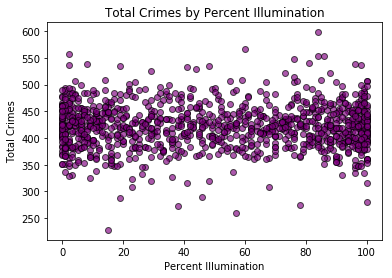

In [15]:
# Scatter plots for total crimes by percent illumination
plt.scatter(sf_summary['Percent Illumination'], sf_summary['Total Crimes'],
            marker ='o', color = 'purple', edgecolor = "black", alpha = 0.65, linewidth = 1)
plt.title('Total Crimes by Percent Illumination')
plt.xlabel('Percent Illumination')
plt.ylabel('Total Crimes')

# Save plot
plt.savefig("images/sf_total_crimes_scatter.png")

# Show plot
plt.show()

In [16]:
# Create percent illumination bins
bins = [0, 3, 10, 21.5, 35.5, 51, 66, 79, 90, 97, 100]
group_name = ['0-3', '4-10', '11-21', 
              '22-35', '36-50', '51-65', 
              '66-78', '79-89', '90-96', '97-100']

sf_summary['Percent Illumination'] = pd.cut(sf_summary['Percent Illumination'], 
                                      bins, 
                                      labels = group_name, 
                                      include_lowest=True)

#Group the merged data by percent illumination
by_illumination = sf_summary.groupby('Percent Illumination')

# Calculate average crime
avg_crime = by_illumination['Total Crimes'].mean()

# Store illumination bins in a dataframe            
sf_summary_new = pd.DataFrame({'Average Crime': avg_crime})

# Print new summary data frame
sf_summary_new

,Average Crime
Percent Illumination,
0-3,422.554688
4-10,423.117021
11-21,419.785047
22-35,419.137615
36-50,421.974359
51-65,420.214953
66-78,423.773585
79-89,426.963964
90-96,419.046296


In [17]:
# Check formatting of sf_summary table
sf_summary

,Date,Percent Illumination,Total Crimes
0,2015-01-01,79-89,553
1,2015-01-02,90-96,433
2,2015-01-03,90-96,444
3,2015-01-04,97-100,335
4,2015-01-05,97-100,459
5,2015-01-06,97-100,417
6,2015-01-07,90-96,397
7,2015-01-08,90-96,394
8,2015-01-09,79-89,509
9,2015-01-10,66-78,424


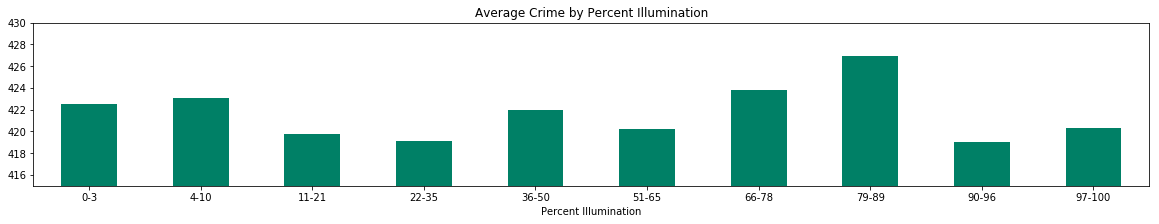

In [18]:
# Use DataFrame.plot() in order to create a bar chart of the data
sf_summary_new.plot(kind="bar", figsize=(20,3), title='Average Crime by Percent Illumination', legend=False, 
                    ylim=(415,430), rot=0, colormap = 'summer')

# Save plot
plt.savefig("images/sf_avgcrime_percillum.png")

# Show plot
plt.show()

In [19]:
# Calculate average crime for each day
sf_daily_avg_crime = sf_crime_total_rename['Total Crimes'].mean()
print(sf_daily_avg_crime)

# Print daily summary data frame
sf_crime_total_rename

421.69890510948903


,Total Crimes
Date,
2015-06-28,598
2016-01-01,567
2017-06-25,557
2015-10-01,554
2015-01-01,553
2017-09-01,548
2017-03-17,541
2017-03-01,539
2015-08-28,539


In [20]:
# Sort the total crimes by day by full moon days only
sf_full_moon = sf_summary.loc[sf_summary['Percent Illumination'] == '97-100', :]
sf_full_moon

,Date,Percent Illumination,Total Crimes
3,2015-01-04,97-100,335
4,2015-01-05,97-100,459
5,2015-01-06,97-100,417
33,2015-02-03,97-100,450
34,2015-02-04,97-100,507
35,2015-02-05,97-100,387
62,2015-03-04,97-100,473
63,2015-03-05,97-100,436
64,2015-03-06,97-100,478
65,2015-03-07,97-100,481


In [21]:
# Perform t-test to determine rejection or acceptance of null hypothesis
stats.ttest_1samp(sf_full_moon['Total Crimes'], sf_daily_avg_crime)

Ttest_1sampResult(statistic=-0.34149248351053635, pvalue=0.7333963943426626)

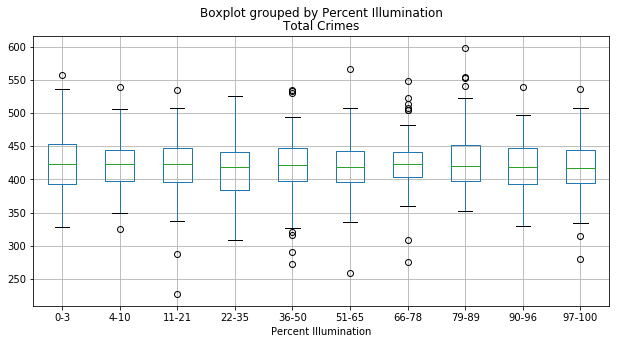

In [22]:
# Create a boxplot to compare means
sf_summary.boxplot("Total Crimes", by="Percent Illumination", figsize=(10, 5))

# Save plot
plt.savefig("images/sf_totalcrime_box.png")

In [23]:
# Extract individual groups for ANOVA
group1 = sf_summary[sf_summary["Percent Illumination"] == "0-3"]["Total Crimes"]
group2 = sf_summary[sf_summary["Percent Illumination"] == "4-10"]["Total Crimes"]
group3 = sf_summary[sf_summary["Percent Illumination"] == "11-21"]["Total Crimes"]
group4 = sf_summary[sf_summary["Percent Illumination"] == "22-35"]["Total Crimes"]
group5 = sf_summary[sf_summary["Percent Illumination"] == "36-50"]["Total Crimes"]
group6 = sf_summary[sf_summary["Percent Illumination"] == "51-65"]["Total Crimes"]
group7 = sf_summary[sf_summary["Percent Illumination"] == "66-78"]["Total Crimes"]
group8 = sf_summary[sf_summary["Percent Illumination"] == "79-89"]["Total Crimes"]
group9 = sf_summary[sf_summary["Percent Illumination"] == "90-96"]["Total Crimes"]
group10 = sf_summary[sf_summary["Percent Illumination"] == "97-100"]["Total Crimes"]

# One way ANOVA test
stats.f_oneway(group1, group2, group3, group4, group5, group6, group7, group8, group9, group10)

F_onewayResult(statistic=0.3869041814802715, pvalue=0.9417907031717064)

# New York City Crime Data Munging

In [24]:
# Read csv into data frame
nyc_raw_data = pd.read_csv('csv_files/nypdcrime.csv')

In [25]:
# Create empty lists to store relevant columns
nyc_date = []
nyc_time = []
nyc_offense = []

# Copy relevant columns to lists
nyc_date.append(nyc_raw_data['CMPLNT_FR_DT'])
nyc_time.append(nyc_raw_data['CMPLNT_FR_TM'])
nyc_offense.append(nyc_raw_data['OFNS_DESC'])

In [26]:
# Build data frame
nyc_crime_data_initial = pd.DataFrame({
    "Date": nyc_date[0],
    "Time": nyc_time[0],
    "Offense": nyc_offense[0]
})

In [27]:
# Remove null values
nyc_crime_data = nyc_crime_data_initial.dropna(subset = ['Offense'])

In [28]:
# Ignore warning created
pd.options.mode.chained_assignment = None

# Strip leading zeros from dates and change date format
nyc_crime_data['Date'] = nyc_crime_data['Date'].apply(lambda x : dt.datetime.strptime(x, '%m/%d/%Y'))

In [29]:
# Read csv into data frame
moon_data = pd.read_csv('csv_files/moonphasedata.csv')

In [30]:
# Change date format
moon_data['Full Date'] = moon_data['Full Date'].apply(lambda x : dt.datetime.strptime(x, '%m/%d/%Y'))

In [31]:
# Merge crime and moon data
nyc_data = nyc_crime_data.merge(moon_data, left_on='Date', 
                                right_on='Full Date').drop(['Full Date', 'Year', 'Day', 'Month'], axis=1)

In [32]:
# Count total crimes by date
nyc_date_list = pd.DataFrame(nyc_data.Date.value_counts())

#Rename title to more accurate title
nyc_date_list2 = nyc_date_list.rename(columns={'Date': 'Total Crimes'})

#Rename index title
nyc_date_list2.index.name = 'Date'

# Merge crime counts and previous total data frame
nyc_date_list3 = nyc_data.merge(nyc_date_list2, how='outer', 
                                left_on='Date', right_on='Date').drop(['Time', 'Offense', 'Moon Phase'], axis=1)

# Remove duplicate rows
nyc_date_list4 = nyc_date_list3.drop_duplicates()

# Sort data frame by date
nyc_date_list5 = nyc_date_list4.sort_values(by='Date')

# Reset index values
nyc_date_list6 = nyc_date_list5.reset_index(drop=True)

# Display data frame
nyc_date_list6

,Date,Percent Illumination,Total Crimes
0,2015-01-01,84.00%,1920
1,2015-01-02,91.00%,1037
2,2015-01-03,96.00%,1019
3,2015-01-04,99.00%,901
4,2015-01-05,100.00%,1058
5,2015-01-06,99.00%,965
6,2015-01-07,96.00%,970
7,2015-01-08,91.00%,1005
8,2015-01-09,85.00%,1142
9,2015-01-10,78.00%,1069


In [33]:
# Convert percentages to decimals
nyc_date_list6['Percent Illumination'] = nyc_date_list6['Percent Illumination'].str.rstrip('%').astype('float')

In [34]:
# Create summary dataframe with necessary columns
nyc_summary = nyc_date_list6.drop('Percent Illumination', 1)

# Export to csv
nyc_summary.to_csv('csv_files/nyc_summary.csv')

# Display dataframe
nyc_summary.head()

,Date,Total Crimes
0,2015-01-01,1920
1,2015-01-02,1037
2,2015-01-03,1019
3,2015-01-04,901
4,2015-01-05,1058


In [35]:
# Create percent illumination bins
bins = [0, 3, 10, 21.5, 35.5, 51, 66, 79, 90, 97, 100]
group_name = ['0-3%', '4-10%', '11-21%', '22-35%', '36-50%', '51-65%', '66-78%', '79-89%', '90-96%', '97-100%']
nyc_date_list6['% Illumination'] = pd.cut(nyc_date_list6['Percent Illumination'], 
                                          bins, 
                                          labels = group_name, 
                                          include_lowest=True)

# Group the merged data by percent illumination
nyc_by_illumination = nyc_date_list6.groupby('% Illumination')

# Calculate average crime
nyc_avg_crime = nyc_by_illumination['Total Crimes'].mean()

# Store illumination bins in a dataframe            
nyc_date_list7 = pd.DataFrame({'Average Crime': nyc_avg_crime})

# Display dataframe
nyc_date_list7

,Average Crime
% Illumination,
0-3%,1307.664062
4-10%,1303.244681
11-21%,1287.420561
22-35%,1292.844037
36-50%,1288.512821
51-65%,1301.205607
66-78%,1275.924528
79-89%,1292.342342
90-96%,1265.805556


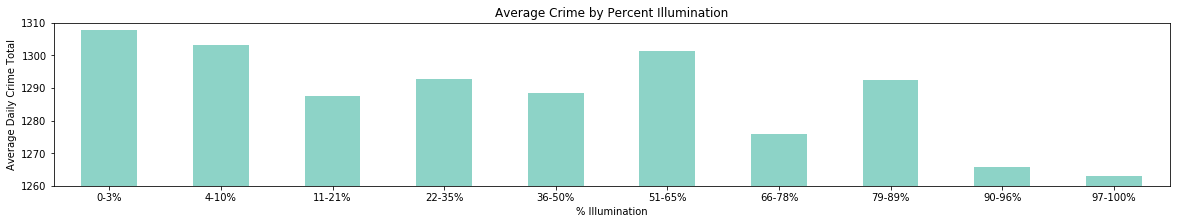

In [36]:
# Create bar graph of data
nyc_date_list7.plot(kind="bar", figsize=(20,3), title='Average Crime by Percent Illumination', legend=False, 
                    ylim=(1260,1310), rot=0, colormap = 'Set3')
plt.ylabel('Average Daily Crime Total')

# Save plot
plt.savefig("images/nyc_avgcrime_percillum.png")

# Show plot
plt.show()

In [37]:
# Calculate average crime
nyc_avg_crime = nyc_date_list6['Total Crimes'].mean()

# Display average crime rate
print(nyc_avg_crime)

1287.962591240876


In [38]:
# Sort the total crimes by day by full moon days only
nyc_full_moon = nyc_date_list6.loc[nyc_date_list6['Percent Illumination'] >= 97.0, :]

# Display dataframe
nyc_full_moon.head()

,Date,Percent Illumination,Total Crimes,% Illumination
3,2015-01-04,99.0,901,97-100%
4,2015-01-05,100.0,1058,97-100%
5,2015-01-06,99.0,965,97-100%
32,2015-02-02,97.0,888,90-96%
33,2015-02-03,99.0,949,97-100%


In [39]:
# Perform t-test to determine rejection or acceptance of null hypothesis
stats.ttest_1samp(nyc_full_moon['Total Crimes'], nyc_avg_crime)

Ttest_1sampResult(statistic=-1.8012874605025793, pvalue=0.07404908005176113)

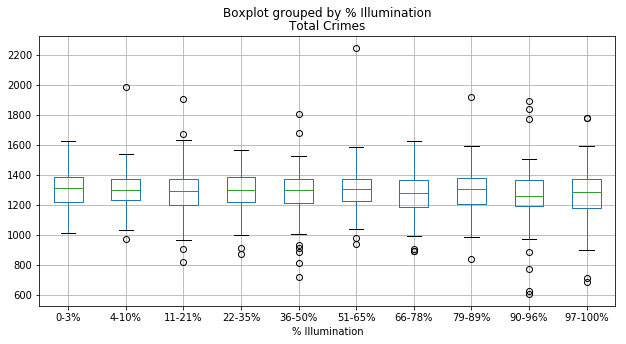

In [40]:
# Create a boxplot to compare means
nyc_date_list6.boxplot("Total Crimes", by="% Illumination", figsize=(10, 5))

# Save boxplot to image
plt.savefig('images/nyc_boxplot.png')

In [41]:
# Adding a new column to display range for each date
nyc_date_list6['% Illumination'] = pd.cut(nyc_date_list6['Percent Illumination'], 
                                      bins, 
                                      labels = group_name, 
                                      include_lowest=True)
# Verify length of data frame
print(len(nyc_date_list6))

# Display data frame
nyc_date_list6.head()

1096


,Date,Percent Illumination,Total Crimes,% Illumination
0,2015-01-01,84.0,1920,79-89%
1,2015-01-02,91.0,1037,90-96%
2,2015-01-03,96.0,1019,90-96%
3,2015-01-04,99.0,901,97-100%
4,2015-01-05,100.0,1058,97-100%


In [42]:
# Extract individual groups
nycgroup1 = nyc_date_list6[nyc_date_list6["% Illumination"] == "0-3%"]["Total Crimes"]
nycgroup2 = nyc_date_list6[nyc_date_list6["% Illumination"] == "4-10%"]["Total Crimes"]
nycgroup3 = nyc_date_list6[nyc_date_list6["% Illumination"] == "11-21%"]["Total Crimes"]
nycgroup4 = nyc_date_list6[nyc_date_list6["% Illumination"] == "22-35%"]["Total Crimes"]
nycgroup5 = nyc_date_list6[nyc_date_list6["% Illumination"] == "36-50%"]["Total Crimes"]
nycgroup6 = nyc_date_list6[nyc_date_list6["% Illumination"] == "51-65%"]["Total Crimes"]
nycgroup7 = nyc_date_list6[nyc_date_list6["% Illumination"] == "66-78%"]["Total Crimes"]
nycgroup8 = nyc_date_list6[nyc_date_list6["% Illumination"] == "79-89%"]["Total Crimes"]
nycgroup9 = nyc_date_list6[nyc_date_list6["% Illumination"] == "90-96%"]["Total Crimes"]
nycgroup10 = nyc_date_list6[nyc_date_list6["% Illumination"] == "97-100%"]["Total Crimes"]

In [43]:
# Perform the ANOVA
stats.f_oneway(nycgroup1, nycgroup2, nycgroup3, nycgroup4, 
               nycgroup5, nycgroup6, nycgroup7, nycgroup8, nycgroup9, nycgroup10)

F_onewayResult(statistic=1.1433911914236847, pvalue=0.3286825791009984)

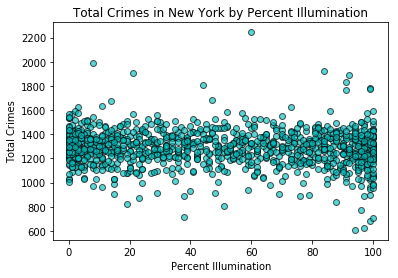

In [44]:
# Scatter plots for total crimes by percent illumination
plt.scatter(nyc_date_list6['Percent Illumination'], nyc_date_list6['Total Crimes'], c='c',
           marker = 'o', edgecolors='black', alpha = 0.65, linewidth = 1)
plt.title('Total Crimes in New York by Percent Illumination')
plt.xlabel('Percent Illumination')
plt.ylabel('Total Crimes')

# Save plot
plt.savefig('images/nyc_total_crimes_scatter.png')

# Show plot
plt.show()

# Minneapolis Crime Data Munging

In [45]:
# Use Pandas to read the Minneapolis crime data and moon data
mpls_crime_data_2015 = pd.read_csv("csv_files/Mpls_Police_Incidents_2015.csv")
mpls_crime_data_2016 = pd.read_csv("csv_files/Mpls_Police_Incidents_2016.csv")
mpls_crime_data_2017 = pd.read_csv("csv_files/Mpls_Police_Incidents_2017.csv")
moon_data = pd.read_csv("csv_files/moonphasedata.csv")
moon_data.head()

,Year,Day,Month,Full Date,Percent Illumination,Moon Phase
0,2015,1,1,1/1/2015,84.00%,Waxing gibbous
1,2015,2,1,1/2/2015,91.00%,Waxing gibbous
2,2015,3,1,1/3/2015,96.00%,Waxing gibbous
3,2015,4,1,1/4/2015,99.00%,Waxing gibbous
4,2015,5,1,1/5/2015,100.00%,Full Moon


In [46]:
mpls_crime_data_2015.head()

,PublicAddress,ControlNbr,CCN,Precinct,ReportedDate,BeginDate,Time,Offense,Description,UCRCode,EnteredDate,GBSID,Lat,Long,X,Y,Neighborhood,LastChanged,LastUpdateDate,ESRI_OID
0,0032XX Lake ST W,3421476,MP 2015 214102,5,2015-06-12T10:25:00.000Z,2015-06-11T17:30:00.000Z,17:30:00,BURGB,Burglary Of Business,6,2015-06-12T10:24:39.000Z,16973.0,44.948416,-93.322806,-1.038865e+07,5.613404e+06,CEDAR - ISLES - DEAN,2015-06-15T07:46:21.000Z,2017-03-03T13:40:06.000Z,8001
1,0032XX Lake ST W,3421480,MP 2015 214103,5,2015-06-12T10:42:00.000Z,2015-06-11T20:15:00.000Z,20:15:00,BURGB,Burglary Of Business,6,2015-06-12T10:41:18.000Z,16973.0,44.948416,-93.322806,-1.038865e+07,5.613404e+06,CEDAR - ISLES - DEAN,2015-06-15T07:47:43.000Z,2017-03-03T13:40:06.000Z,8002
2,0032XX Lake ST W,3421483,MP 2015 214106,5,2015-06-12T10:56:00.000Z,2015-06-11T20:00:00.000Z,20:00:00,BURGB,Burglary Of Business,6,2015-06-12T10:55:54.000Z,16973.0,44.948416,-93.322806,-1.038865e+07,5.613404e+06,CEDAR - ISLES - DEAN,2015-06-16T12:47:22.000Z,2017-03-03T13:40:06.000Z,8003
3,0010XX Knox AV N,3421485,MP 2015 214187,4,2015-06-12T11:03:00.000Z,2015-06-11T09:43:00.000Z,09:43:00,CSCR,Crim Sex Cond-rape,3,2015-06-12T11:02:13.000Z,22235.0,44.988301,-93.301967,-1.038633e+07,5.619680e+06,NEAR - NORTH,2015-06-26T07:16:57.000Z,2017-03-03T13:40:06.000Z,8004
4,0048XX Girard AV N,3421489,MP 2015 214266,4,2015-06-12T11:05:00.000Z,2015-06-11T22:00:00.000Z,22:00:00,TFMV,Theft From Motr Vehc,7,2015-06-12T11:10:30.000Z,10871.0,45.043006,-93.297904,-1.038588e+07,5.628295e+06,LIND - BOHANON,2015-06-18T06:12:11.000Z,2017-03-03T13:40:06.000Z,8005


In [47]:
mpls_crime_data_2016.head()

,PublicAddress,ControlNbr,CCN,Precinct,ReportedDate,BeginDate,Time,Offense,Description,UCRCode,EnteredDate,GBSID,Lat,Long,X,Y,Neighborhood,LastChanged,LastUpdateDate,ESRI_OID
0,0005XX 8 AV SE,3494616,MP 2016 000079,2,2016-01-01T01:36:00.000Z,2016-01-01T00:37:00.000Z,00:37:00,MURDR,Murder (general),1,2016-01-01T01:36:34.000Z,21226.0,44.985285,-93.242935,-1.037976e+07,5.619205e+06,MARCY HOLMES,2016-06-22T12:58:18.000Z,2017-03-03T13:40:06.000Z,1
1,0003XX 17 AV NE,3494617,MP 2015 470887,2,2016-01-01T01:40:00.000Z,2015-12-31T23:53:00.000Z,23:53:00,ASLT2,Asslt W/dngrs Weapon,5,2016-01-01T01:38:20.000Z,15283.0,45.005276,-93.263861,-1.038209e+07,5.622352e+06,SHERIDAN,2016-01-01T07:23:34.000Z,2017-03-03T13:40:06.000Z,2
2,0009XX Washington AV S,3494618,MP 2016 000094,1,2016-01-01T02:00:00.000Z,2016-01-01T00:46:00.000Z,00:46:00,DASLT1,1st Deg Domes Asslt,5,2016-01-01T01:38:46.000Z,25093.0,44.976351,-93.255141,-1.038111e+07,5.617799e+06,DOWNTOWN EAST,2016-01-02T12:59:52.000Z,2017-03-03T13:40:06.000Z,3
3,0002XX Market ST,3494619,MP 2015 470861,4,2016-01-01T01:43:00.000Z,2015-12-31T23:24:00.000Z,23:24:00,ASLT4,Aslt-police/emerg P,5,2016-01-01T01:43:33.000Z,18914.0,44.980229,-93.289832,-1.038498e+07,5.618409e+06,SUMNER - GLENWOOD,2016-02-08T23:04:56.000Z,2017-03-03T13:40:06.000Z,4
4,0006XX 2 AV S,3494624,MP 2016 000177,1,2016-01-01T02:10:00.000Z,2016-01-01T01:20:00.000Z,01:20:00,BURGB,Burglary Of Business,6,2016-01-01T02:11:40.000Z,17250.0,44.976224,-93.269109,-1.038267e+07,5.617779e+06,DOWNTOWN WEST,2016-01-11T11:11:10.000Z,2017-03-03T13:40:06.000Z,5


In [48]:
mpls_crime_data_2017.head()

,PublicAddress,ControlNbr,CCN,Precinct,ReportedDate,BeginDate,Time,Offense,Description,UCRCode,EnteredDate,GBSID,Lat,Long,X,Y,Neighborhood,LastChanged,LastUpdateDate,OBJECTID
0,0010XX 27 AV SE,3660458,MP 2017 998109,2.0,2017-04-12T17:09:59.000Z,2017-04-08T15:43:00.000Z,15:43:00,THEFT,Other Theft,7,2017-04-12T17:09:59.000Z,21426.0,44.988868,-93.215180,-1.037667e+07,5.619769e+06,COMO,2017-04-12T17:10:02.000Z,2017-04-12T20:00:31.000Z,1001
1,0006XX Nicollet Mall,3660463,MP 2017 130776,1.0,2017-04-12T17:52:00.000Z,2017-04-12T11:37:00.000Z,11:37:00,THEFT,Other Theft,7,2017-04-12T17:50:57.000Z,21933.0,44.977367,-93.271796,-1.038297e+07,5.617959e+06,DOWNTOWN WEST,2017-04-12T19:59:26.000Z,2017-04-12T20:00:31.000Z,1002
2,Broadway AV W / Penn AV N,3670871,MP 2017 172790,4.0,2017-05-12T18:57:00.000Z,2017-05-12T01:30:00.000Z,01:30:00,CSCR,Crim Sex Cond-rape,3,2017-05-12T18:55:35.000Z,NaN,45.003870,-93.308200,-1.038702e+07,5.622130e+06,WILLARD - HAY,2017-05-16T03:56:02.000Z,2017-05-16T20:00:34.000Z,1003
3,0019XX Marshall ST NE,3671162,MP 2017 174973,2.0,2017-05-14T01:50:00.000Z,2017-05-13T23:55:00.000Z,23:55:00,TFMV,Theft From Motr Vehc,7,2017-05-14T01:48:41.000Z,15276.0,45.008036,-93.271699,-1.038296e+07,5.622787e+06,BOTTINEAU,2017-05-16T11:28:33.000Z,2017-05-16T20:00:34.000Z,1004
4,0000XX 6 AV SE,3671205,MP 2017 175162,2.0,2017-05-14T06:30:00.000Z,2017-05-14T03:10:00.000Z,03:10:00,ROBPAG,Robbery Per Agg,4,2017-05-14T06:23:30.000Z,17863.0,44.981687,-93.249542,-1.038049e+07,5.618639e+06,MARCY HOLMES,2017-05-16T11:24:07.000Z,2017-05-16T20:00:34.000Z,1005


In [49]:
# The data for 2017 has OBJECTID instead of ESRI_OID, but it is not needed for our analysis.
mpls_crime_data_2015.columns

Index(['PublicAddress', 'ControlNbr', 'CCN', 'Precinct', 'ReportedDate',
       'BeginDate', 'Time', 'Offense', 'Description', 'UCRCode', 'EnteredDate',
       'GBSID', 'Lat', 'Long', 'X', 'Y', 'Neighborhood', 'LastChanged',
       'LastUpdateDate', 'ESRI_OID'],
      dtype='object')

In [50]:
mpls_crime_data_2016.columns

Index(['PublicAddress', 'ControlNbr', 'CCN', 'Precinct', 'ReportedDate',
       'BeginDate', 'Time', 'Offense', 'Description', 'UCRCode', 'EnteredDate',
       'GBSID', 'Lat', 'Long', 'X', 'Y', 'Neighborhood', 'LastChanged',
       'LastUpdateDate', 'ESRI_OID'],
      dtype='object')

In [51]:
mpls_crime_data_2017.columns

Index(['PublicAddress', 'ControlNbr', 'CCN', 'Precinct', 'ReportedDate',
       'BeginDate', 'Time', 'Offense', 'Description', 'UCRCode', 'EnteredDate',
       'GBSID', 'Lat', 'Long', 'X', 'Y', 'Neighborhood', 'LastChanged',
       'LastUpdateDate', 'OBJECTID'],
      dtype='object')

In [52]:
# Append data sets for 2015 and 2016 into a new data frame
mpls_crime_data = mpls_crime_data_2015.append(mpls_crime_data_2016, ignore_index=True)
print(f"Number of rows = {len(mpls_crime_data)}")
mpls_crime_data.head()

Number of rows = 40153


,PublicAddress,ControlNbr,CCN,Precinct,ReportedDate,BeginDate,Time,Offense,Description,UCRCode,EnteredDate,GBSID,Lat,Long,X,Y,Neighborhood,LastChanged,LastUpdateDate,ESRI_OID
0,0032XX Lake ST W,3421476,MP 2015 214102,5,2015-06-12T10:25:00.000Z,2015-06-11T17:30:00.000Z,17:30:00,BURGB,Burglary Of Business,6,2015-06-12T10:24:39.000Z,16973.0,44.948416,-93.322806,-1.038865e+07,5.613404e+06,CEDAR - ISLES - DEAN,2015-06-15T07:46:21.000Z,2017-03-03T13:40:06.000Z,8001
1,0032XX Lake ST W,3421480,MP 2015 214103,5,2015-06-12T10:42:00.000Z,2015-06-11T20:15:00.000Z,20:15:00,BURGB,Burglary Of Business,6,2015-06-12T10:41:18.000Z,16973.0,44.948416,-93.322806,-1.038865e+07,5.613404e+06,CEDAR - ISLES - DEAN,2015-06-15T07:47:43.000Z,2017-03-03T13:40:06.000Z,8002
2,0032XX Lake ST W,3421483,MP 2015 214106,5,2015-06-12T10:56:00.000Z,2015-06-11T20:00:00.000Z,20:00:00,BURGB,Burglary Of Business,6,2015-06-12T10:55:54.000Z,16973.0,44.948416,-93.322806,-1.038865e+07,5.613404e+06,CEDAR - ISLES - DEAN,2015-06-16T12:47:22.000Z,2017-03-03T13:40:06.000Z,8003
3,0010XX Knox AV N,3421485,MP 2015 214187,4,2015-06-12T11:03:00.000Z,2015-06-11T09:43:00.000Z,09:43:00,CSCR,Crim Sex Cond-rape,3,2015-06-12T11:02:13.000Z,22235.0,44.988301,-93.301967,-1.038633e+07,5.619680e+06,NEAR - NORTH,2015-06-26T07:16:57.000Z,2017-03-03T13:40:06.000Z,8004
4,0048XX Girard AV N,3421489,MP 2015 214266,4,2015-06-12T11:05:00.000Z,2015-06-11T22:00:00.000Z,22:00:00,TFMV,Theft From Motr Vehc,7,2015-06-12T11:10:30.000Z,10871.0,45.043006,-93.297904,-1.038588e+07,5.628295e+06,LIND - BOHANON,2015-06-18T06:12:11.000Z,2017-03-03T13:40:06.000Z,8005


In [53]:
# Append data for 2017 into the new data frame
mpls_crime_data = mpls_crime_data.append(mpls_crime_data_2017, ignore_index=True, sort=True)
print(f"Number of rows = {len(mpls_crime_data)}")
mpls_crime_data.head()

Number of rows = 62238


,BeginDate,CCN,ControlNbr,Description,ESRI_OID,EnteredDate,GBSID,LastChanged,LastUpdateDate,Lat,...,Neighborhood,OBJECTID,Offense,Precinct,PublicAddress,ReportedDate,Time,UCRCode,X,Y
0,2015-06-11T17:30:00.000Z,MP 2015 214102,3421476,Burglary Of Business,8001.0,2015-06-12T10:24:39.000Z,16973.0,2015-06-15T07:46:21.000Z,2017-03-03T13:40:06.000Z,44.948416,...,CEDAR - ISLES - DEAN,NaN,BURGB,5.0,0032XX Lake ST W,2015-06-12T10:25:00.000Z,17:30:00,6,-1.038865e+07,5.613404e+06
1,2015-06-11T20:15:00.000Z,MP 2015 214103,3421480,Burglary Of Business,8002.0,2015-06-12T10:41:18.000Z,16973.0,2015-06-15T07:47:43.000Z,2017-03-03T13:40:06.000Z,44.948416,...,CEDAR - ISLES - DEAN,NaN,BURGB,5.0,0032XX Lake ST W,2015-06-12T10:42:00.000Z,20:15:00,6,-1.038865e+07,5.613404e+06
2,2015-06-11T20:00:00.000Z,MP 2015 214106,3421483,Burglary Of Business,8003.0,2015-06-12T10:55:54.000Z,16973.0,2015-06-16T12:47:22.000Z,2017-03-03T13:40:06.000Z,44.948416,...,CEDAR - ISLES - DEAN,NaN,BURGB,5.0,0032XX Lake ST W,2015-06-12T10:56:00.000Z,20:00:00,6,-1.038865e+07,5.613404e+06
3,2015-06-11T09:43:00.000Z,MP 2015 214187,3421485,Crim Sex Cond-rape,8004.0,2015-06-12T11:02:13.000Z,22235.0,2015-06-26T07:16:57.000Z,2017-03-03T13:40:06.000Z,44.988301,...,NEAR - NORTH,NaN,CSCR,4.0,0010XX Knox AV N,2015-06-12T11:03:00.000Z,09:43:00,3,-1.038633e+07,5.619680e+06
4,2015-06-11T22:00:00.000Z,MP 2015 214266,3421489,Theft From Motr Vehc,8005.0,2015-06-12T11:10:30.000Z,10871.0,2015-06-18T06:12:11.000Z,2017-03-03T13:40:06.000Z,45.043006,...,LIND - BOHANON,NaN,TFMV,4.0,0048XX Girard AV N,2015-06-12T11:05:00.000Z,22:00:00,7,-1.038588e+07,5.628295e+06


In [54]:
# Rename Full Date column
moon_data.rename(columns = {'Full Date':'Date'}, inplace = True)
moon_data.head()

,Year,Day,Month,Date,Percent Illumination,Moon Phase
0,2015,1,1,1/1/2015,84.00%,Waxing gibbous
1,2015,2,1,1/2/2015,91.00%,Waxing gibbous
2,2015,3,1,1/3/2015,96.00%,Waxing gibbous
3,2015,4,1,1/4/2015,99.00%,Waxing gibbous
4,2015,5,1,1/5/2015,100.00%,Full Moon


In [55]:
# Convert Date column from m/d/yyyy to yyyy-mm-dd format
moon_data["Date"] = moon_data["Date"].apply(lambda x: str(dt.datetime.strptime(x, '%m/%d/%Y'))[:10] )
print(f"Number of rows = {len(moon_data)}")
moon_data.head()

Number of rows = 1096


,Year,Day,Month,Date,Percent Illumination,Moon Phase
0,2015,1,1,2015-01-01,84.00%,Waxing gibbous
1,2015,2,1,2015-01-02,91.00%,Waxing gibbous
2,2015,3,1,2015-01-03,96.00%,Waxing gibbous
3,2015,4,1,2015-01-04,99.00%,Waxing gibbous
4,2015,5,1,2015-01-05,100.00%,Full Moon


In [56]:
# Add new column Date from BeginDate in yyyy-mm-dd format
mpls_crime_data["Date"] = mpls_crime_data["BeginDate"].apply(lambda x: str(dt.datetime.strptime(x, '%Y-%m-%dT%H:%M:%S.000Z'))[:10] )
print(f"Number of rows = {len(mpls_crime_data)}")
mpls_crime_data.head()

Number of rows = 62238


,BeginDate,CCN,ControlNbr,Description,ESRI_OID,EnteredDate,GBSID,LastChanged,LastUpdateDate,Lat,...,OBJECTID,Offense,Precinct,PublicAddress,ReportedDate,Time,UCRCode,X,Y,Date
0,2015-06-11T17:30:00.000Z,MP 2015 214102,3421476,Burglary Of Business,8001.0,2015-06-12T10:24:39.000Z,16973.0,2015-06-15T07:46:21.000Z,2017-03-03T13:40:06.000Z,44.948416,...,NaN,BURGB,5.0,0032XX Lake ST W,2015-06-12T10:25:00.000Z,17:30:00,6,-1.038865e+07,5.613404e+06,2015-06-11
1,2015-06-11T20:15:00.000Z,MP 2015 214103,3421480,Burglary Of Business,8002.0,2015-06-12T10:41:18.000Z,16973.0,2015-06-15T07:47:43.000Z,2017-03-03T13:40:06.000Z,44.948416,...,NaN,BURGB,5.0,0032XX Lake ST W,2015-06-12T10:42:00.000Z,20:15:00,6,-1.038865e+07,5.613404e+06,2015-06-11
2,2015-06-11T20:00:00.000Z,MP 2015 214106,3421483,Burglary Of Business,8003.0,2015-06-12T10:55:54.000Z,16973.0,2015-06-16T12:47:22.000Z,2017-03-03T13:40:06.000Z,44.948416,...,NaN,BURGB,5.0,0032XX Lake ST W,2015-06-12T10:56:00.000Z,20:00:00,6,-1.038865e+07,5.613404e+06,2015-06-11
3,2015-06-11T09:43:00.000Z,MP 2015 214187,3421485,Crim Sex Cond-rape,8004.0,2015-06-12T11:02:13.000Z,22235.0,2015-06-26T07:16:57.000Z,2017-03-03T13:40:06.000Z,44.988301,...,NaN,CSCR,4.0,0010XX Knox AV N,2015-06-12T11:03:00.000Z,09:43:00,3,-1.038633e+07,5.619680e+06,2015-06-11
4,2015-06-11T22:00:00.000Z,MP 2015 214266,3421489,Theft From Motr Vehc,8005.0,2015-06-12T11:10:30.000Z,10871.0,2015-06-18T06:12:11.000Z,2017-03-03T13:40:06.000Z,45.043006,...,NaN,TFMV,4.0,0048XX Girard AV N,2015-06-12T11:05:00.000Z,22:00:00,7,-1.038588e+07,5.628295e+06,2015-06-11


In [57]:
# Remove data before 1/1/2015
print(f"old data set size = {len(mpls_crime_data)}")
print(f"old date range = {mpls_crime_data['Date'].min()} to {mpls_crime_data['Date'].max()}")
mpls_crime_data = mpls_crime_data.loc[mpls_crime_data['Date'] >= '2015-01-01',:]

print(f"new data set size = {len(mpls_crime_data)}")
print(f"new date range = {mpls_crime_data['Date'].min()} to {mpls_crime_data['Date'].max()}")
mpls_crime_data.head()

old data set size = 62238
old date range = 2010-05-03 to 2017-12-31
new data set size = 61962
new date range = 2015-01-01 to 2017-12-31


,BeginDate,CCN,ControlNbr,Description,ESRI_OID,EnteredDate,GBSID,LastChanged,LastUpdateDate,Lat,...,OBJECTID,Offense,Precinct,PublicAddress,ReportedDate,Time,UCRCode,X,Y,Date
0,2015-06-11T17:30:00.000Z,MP 2015 214102,3421476,Burglary Of Business,8001.0,2015-06-12T10:24:39.000Z,16973.0,2015-06-15T07:46:21.000Z,2017-03-03T13:40:06.000Z,44.948416,...,NaN,BURGB,5.0,0032XX Lake ST W,2015-06-12T10:25:00.000Z,17:30:00,6,-1.038865e+07,5.613404e+06,2015-06-11
1,2015-06-11T20:15:00.000Z,MP 2015 214103,3421480,Burglary Of Business,8002.0,2015-06-12T10:41:18.000Z,16973.0,2015-06-15T07:47:43.000Z,2017-03-03T13:40:06.000Z,44.948416,...,NaN,BURGB,5.0,0032XX Lake ST W,2015-06-12T10:42:00.000Z,20:15:00,6,-1.038865e+07,5.613404e+06,2015-06-11
2,2015-06-11T20:00:00.000Z,MP 2015 214106,3421483,Burglary Of Business,8003.0,2015-06-12T10:55:54.000Z,16973.0,2015-06-16T12:47:22.000Z,2017-03-03T13:40:06.000Z,44.948416,...,NaN,BURGB,5.0,0032XX Lake ST W,2015-06-12T10:56:00.000Z,20:00:00,6,-1.038865e+07,5.613404e+06,2015-06-11
3,2015-06-11T09:43:00.000Z,MP 2015 214187,3421485,Crim Sex Cond-rape,8004.0,2015-06-12T11:02:13.000Z,22235.0,2015-06-26T07:16:57.000Z,2017-03-03T13:40:06.000Z,44.988301,...,NaN,CSCR,4.0,0010XX Knox AV N,2015-06-12T11:03:00.000Z,09:43:00,3,-1.038633e+07,5.619680e+06,2015-06-11
4,2015-06-11T22:00:00.000Z,MP 2015 214266,3421489,Theft From Motr Vehc,8005.0,2015-06-12T11:10:30.000Z,10871.0,2015-06-18T06:12:11.000Z,2017-03-03T13:40:06.000Z,45.043006,...,NaN,TFMV,4.0,0048XX Girard AV N,2015-06-12T11:05:00.000Z,22:00:00,7,-1.038588e+07,5.628295e+06,2015-06-11


In [58]:
# Combine the data into a single dataset
mpls_data_comp = pd.merge(mpls_crime_data, moon_data, how="left", on = 'Date')
print(f"Number of rows = {len(mpls_data_comp)}")
mpls_data_comp

Number of rows = 61962


,BeginDate,CCN,ControlNbr,Description,ESRI_OID,EnteredDate,GBSID,LastChanged,LastUpdateDate,Lat,...,Time,UCRCode,X,Y,Date,Year,Day,Month,Percent Illumination,Moon Phase
0,2015-06-11T17:30:00.000Z,MP 2015 214102,3421476,Burglary Of Business,8001.0,2015-06-12T10:24:39.000Z,16973.0,2015-06-15T07:46:21.000Z,2017-03-03T13:40:06.000Z,44.948416,...,17:30:00,6,-1.038865e+07,5.613404e+06,2015-06-11,2015,11,6,32.00%,Waning crescent
1,2015-06-11T20:15:00.000Z,MP 2015 214103,3421480,Burglary Of Business,8002.0,2015-06-12T10:41:18.000Z,16973.0,2015-06-15T07:47:43.000Z,2017-03-03T13:40:06.000Z,44.948416,...,20:15:00,6,-1.038865e+07,5.613404e+06,2015-06-11,2015,11,6,32.00%,Waning crescent
2,2015-06-11T20:00:00.000Z,MP 2015 214106,3421483,Burglary Of Business,8003.0,2015-06-12T10:55:54.000Z,16973.0,2015-06-16T12:47:22.000Z,2017-03-03T13:40:06.000Z,44.948416,...,20:00:00,6,-1.038865e+07,5.613404e+06,2015-06-11,2015,11,6,32.00%,Waning crescent
3,2015-06-11T09:43:00.000Z,MP 2015 214187,3421485,Crim Sex Cond-rape,8004.0,2015-06-12T11:02:13.000Z,22235.0,2015-06-26T07:16:57.000Z,2017-03-03T13:40:06.000Z,44.988301,...,09:43:00,3,-1.038633e+07,5.619680e+06,2015-06-11,2015,11,6,32.00%,Waning crescent
4,2015-06-11T22:00:00.000Z,MP 2015 214266,3421489,Theft From Motr Vehc,8005.0,2015-06-12T11:10:30.000Z,10871.0,2015-06-18T06:12:11.000Z,2017-03-03T13:40:06.000Z,45.043006,...,22:00:00,7,-1.038588e+07,5.628295e+06,2015-06-11,2015,11,6,32.00%,Waning crescent
5,2015-06-11T23:00:00.000Z,MP 2015 997147,3421491,Theft From Motr Vehc,8006.0,2015-06-12T11:24:59.000Z,11968.0,2015-08-17T13:07:55.000Z,2017-03-03T13:40:06.000Z,44.945639,...,23:00:00,7,-1.038082e+07,5.612967e+06,2015-06-11,2015,11,6,32.00%,Waning crescent
6,2015-06-12T11:11:00.000Z,MP 2015 214290,3421502,Burglary Of Dwelling,8007.0,2015-06-12T11:43:53.000Z,20602.0,2015-06-15T08:51:37.000Z,2017-03-03T13:40:06.000Z,45.005987,...,11:11:00,6,-1.038625e+07,5.622464e+06,2015-06-12,2015,12,6,22.00%,Waning crescent
7,2015-06-12T00:01:00.000Z,MP 2015 214277,3421505,Burglary Of Dwelling,8008.0,2015-06-12T11:49:28.000Z,22368.0,2016-01-19T08:03:42.000Z,2017-03-03T13:40:06.000Z,45.021239,...,00:01:00,6,-1.038520e+07,5.624866e+06,2015-06-12,2015,12,6,22.00%,Waning crescent
8,2015-06-11T15:00:00.000Z,MP 2015 997146,3421507,Other Theft,8009.0,2015-06-12T11:53:46.000Z,16489.0,2015-06-12T12:23:09.000Z,2017-03-03T13:40:06.000Z,44.962721,...,15:00:00,7,-1.038138e+07,5.615655e+06,2015-06-11,2015,11,6,32.00%,Waning crescent
9,2015-06-11T11:41:00.000Z,MP 2015 214324,3421516,Other Theft,8010.0,2015-06-12T12:04:12.000Z,12732.0,2015-06-12T12:22:58.000Z,2017-03-03T13:40:06.000Z,44.917006,...,11:41:00,7,-1.038180e+07,5.608465e+06,2015-06-11,2015,11,6,32.00%,Waning crescent


In [59]:
# List of column names in dataframe
mpls_data_comp.columns

Index(['BeginDate', 'CCN', 'ControlNbr', 'Description', 'ESRI_OID',
       'EnteredDate', 'GBSID', 'LastChanged', 'LastUpdateDate', 'Lat', 'Long',
       'Neighborhood', 'OBJECTID', 'Offense', 'Precinct', 'PublicAddress',
       'ReportedDate', 'Time', 'UCRCode', 'X', 'Y', 'Date', 'Year', 'Day',
       'Month', 'Percent Illumination', 'Moon Phase'],
      dtype='object')

In [60]:
# Create new data frame
mpls_data_clean = mpls_data_comp

# Remove unwanted columns
mpls_data_clean.drop(labels=['CCN', 'ESRI_OID', 'GBSID', 'LastChanged', 
                             'LastUpdateDate', 'X', 'Y', 'Year', 'Day', 'Month'], axis=1, inplace=True)
mpls_data_clean

,BeginDate,ControlNbr,Description,EnteredDate,Lat,Long,Neighborhood,OBJECTID,Offense,Precinct,PublicAddress,ReportedDate,Time,UCRCode,Date,Percent Illumination,Moon Phase
0,2015-06-11T17:30:00.000Z,3421476,Burglary Of Business,2015-06-12T10:24:39.000Z,44.948416,-93.322806,CEDAR - ISLES - DEAN,NaN,BURGB,5.0,0032XX Lake ST W,2015-06-12T10:25:00.000Z,17:30:00,6,2015-06-11,32.00%,Waning crescent
1,2015-06-11T20:15:00.000Z,3421480,Burglary Of Business,2015-06-12T10:41:18.000Z,44.948416,-93.322806,CEDAR - ISLES - DEAN,NaN,BURGB,5.0,0032XX Lake ST W,2015-06-12T10:42:00.000Z,20:15:00,6,2015-06-11,32.00%,Waning crescent
2,2015-06-11T20:00:00.000Z,3421483,Burglary Of Business,2015-06-12T10:55:54.000Z,44.948416,-93.322806,CEDAR - ISLES - DEAN,NaN,BURGB,5.0,0032XX Lake ST W,2015-06-12T10:56:00.000Z,20:00:00,6,2015-06-11,32.00%,Waning crescent
3,2015-06-11T09:43:00.000Z,3421485,Crim Sex Cond-rape,2015-06-12T11:02:13.000Z,44.988301,-93.301967,NEAR - NORTH,NaN,CSCR,4.0,0010XX Knox AV N,2015-06-12T11:03:00.000Z,09:43:00,3,2015-06-11,32.00%,Waning crescent
4,2015-06-11T22:00:00.000Z,3421489,Theft From Motr Vehc,2015-06-12T11:10:30.000Z,45.043006,-93.297904,LIND - BOHANON,NaN,TFMV,4.0,0048XX Girard AV N,2015-06-12T11:05:00.000Z,22:00:00,7,2015-06-11,32.00%,Waning crescent
5,2015-06-11T23:00:00.000Z,3421491,Theft From Motr Vehc,2015-06-12T11:24:59.000Z,44.945639,-93.252481,POWDERHORN PARK,NaN,TFMV,3.0,0031XX Bloomington AV S,2015-06-12T11:24:59.000Z,23:00:00,7,2015-06-11,32.00%,Waning crescent
6,2015-06-12T11:11:00.000Z,3421502,Burglary Of Dwelling,2015-06-12T11:43:53.000Z,45.005987,-93.301256,JORDAN,NaN,BURGD,4.0,0016XX 26 AV N,2015-06-12T11:45:00.000Z,11:11:00,6,2015-06-12,22.00%,Waning crescent
7,2015-06-12T00:01:00.000Z,3421505,Burglary Of Dwelling,2015-06-12T11:49:28.000Z,45.021239,-93.291823,MCKINLEY,NaN,BURGD,4.0,0036XX Colfax AV N,2015-06-12T11:30:00.000Z,00:01:00,6,2015-06-12,22.00%,Waning crescent
8,2015-06-11T15:00:00.000Z,3421507,Other Theft,2015-06-12T11:53:46.000Z,44.962721,-93.257495,VENTURA VILLAGE,NaN,THEFT,3.0,0011XX Franklin AV E,2015-06-12T11:53:46.000Z,15:00:00,7,2015-06-11,32.00%,Waning crescent
9,2015-06-11T11:41:00.000Z,3421516,Other Theft,2015-06-12T12:04:12.000Z,44.917006,-93.261340,NORTHROP,NaN,THEFT,3.0,0047XX Elliot AV S,2015-06-12T12:04:00.000Z,11:41:00,7,2015-06-11,32.00%,Waning crescent


In [61]:
# Create an overview table that summarizes necessary data: 

# Total crime by date
mpls_crime_total = pd.DataFrame(mpls_data_clean.Date.value_counts())

# Rename Date column to Total Crimes
mpls_crime_total_rename = mpls_crime_total.rename(columns={'Date': 'Total Crimes'})

# Add index title for Total Crime
mpls_crime_total_rename.index.name = 'Date'

# Merge crime counts with previous total data frame
mpls_totcrime = mpls_data_clean.merge(mpls_crime_total_rename, 
                                      how='outer', on='Date').drop(['Time', 'Moon Phase'], axis=1)

# Remove duplicate dates/condense
mpls_totcrime_rm = mpls_totcrime.drop_duplicates()

# Sort data frame by date
mpls_sum_bydate = mpls_totcrime_rm.sort_values(by='Date')

# Reset index values
mpls_summary = mpls_sum_bydate.reset_index(drop=True)

# Print the data
# print(mpls_crime_total)
mpls_summary.head()

,BeginDate,ControlNbr,Description,EnteredDate,Lat,Long,Neighborhood,OBJECTID,Offense,Precinct,PublicAddress,ReportedDate,UCRCode,Date,Percent Illumination,Total Crimes
0,2015-01-01T01:40:00.000Z,3363235,Robbery Of Person,2015-01-01T02:49:04.000Z,44.982070,-93.271390,DOWNTOWN WEST,NaN,ROBPER,1.0,1 AV N / 3 ST N,2015-01-01T02:50:00.000Z,4,2015-01-01,84.00%,61
1,2015-01-01T23:25:00.000Z,3363420,Robbery Of Person,2015-01-02T00:08:01.000Z,44.961801,-93.277819,WHITTIER,NaN,ROBPER,5.0,0020XX Nicollet AV S,2015-01-02T00:10:00.000Z,4,2015-01-01,84.00%,61
2,2015-01-01T23:22:00.000Z,3363416,Aslt-police/emerg P,2015-01-01T23:49:31.000Z,45.000270,-93.298820,JORDAN,NaN,ASLT4,4.0,Hillside AV / Irving AV N,2015-01-01T23:49:00.000Z,5,2015-01-01,84.00%,61
3,2015-01-01T20:45:00.000Z,3363413,Shoplifting,2015-01-01T23:22:11.000Z,44.948372,-93.235147,LONGFELLOW,NaN,SHOPLF,3.0,0025XX Lake ST E,2015-01-01T23:25:00.000Z,7,2015-01-01,84.00%,61
4,2015-01-01T22:00:00.000Z,3363410,Motor Vehicle Theft,2015-01-01T23:10:14.000Z,44.959121,-93.260557,VENTURA VILLAGE,NaN,AUTOTH,3.0,0009XX 24 ST E,2015-01-01T23:10:00.000Z,8,2015-01-01,84.00%,61


In [62]:
# Changing the Percent Illumination column data type to a float for binning below
mpls_summary['Percent Illumination'] = mpls_summary['Percent Illumination'].str.rstrip('%').astype('float')
mpls_summary

,BeginDate,ControlNbr,Description,EnteredDate,Lat,Long,Neighborhood,OBJECTID,Offense,Precinct,PublicAddress,ReportedDate,UCRCode,Date,Percent Illumination,Total Crimes
0,2015-01-01T01:40:00.000Z,3363235,Robbery Of Person,2015-01-01T02:49:04.000Z,44.982070,-93.271390,DOWNTOWN WEST,NaN,ROBPER,1.0,1 AV N / 3 ST N,2015-01-01T02:50:00.000Z,4,2015-01-01,84.0,61
1,2015-01-01T23:25:00.000Z,3363420,Robbery Of Person,2015-01-02T00:08:01.000Z,44.961801,-93.277819,WHITTIER,NaN,ROBPER,5.0,0020XX Nicollet AV S,2015-01-02T00:10:00.000Z,4,2015-01-01,84.0,61
2,2015-01-01T23:22:00.000Z,3363416,Aslt-police/emerg P,2015-01-01T23:49:31.000Z,45.000270,-93.298820,JORDAN,NaN,ASLT4,4.0,Hillside AV / Irving AV N,2015-01-01T23:49:00.000Z,5,2015-01-01,84.0,61
3,2015-01-01T20:45:00.000Z,3363413,Shoplifting,2015-01-01T23:22:11.000Z,44.948372,-93.235147,LONGFELLOW,NaN,SHOPLF,3.0,0025XX Lake ST E,2015-01-01T23:25:00.000Z,7,2015-01-01,84.0,61
4,2015-01-01T22:00:00.000Z,3363410,Motor Vehicle Theft,2015-01-01T23:10:14.000Z,44.959121,-93.260557,VENTURA VILLAGE,NaN,AUTOTH,3.0,0009XX 24 ST E,2015-01-01T23:10:00.000Z,8,2015-01-01,84.0,61
5,2015-01-01T21:03:00.000Z,3363407,Burglary Of Dwelling,2015-01-01T22:37:04.000Z,44.996900,-93.249252,ST. ANTHONY EAST,NaN,BURGD,2.0,0008XX Summer ST NE,2015-01-01T23:00:00.000Z,6,2015-01-01,84.0,61
6,2015-01-01T19:16:00.000Z,3363392,Robbery Of Person,2015-01-01T20:13:32.000Z,45.024020,-93.300044,FOLWELL,NaN,ROBPER,4.0,0016XX Dowling AV N,2015-01-01T20:13:00.000Z,4,2015-01-01,84.0,61
7,2015-01-01T17:59:00.000Z,3363390,Asslt W/dngrs Weapon,2015-01-01T19:59:29.000Z,44.999692,-93.310774,WILLARD - HAY,NaN,ASLT2,4.0,0019XX Russell AV N,2015-01-01T20:01:00.000Z,5,2015-01-01,84.0,61
8,2015-01-01T07:00:00.000Z,3363385,Burglary Of Business,2015-01-01T19:24:48.000Z,44.981655,-93.271963,DOWNTOWN WEST,NaN,BURGB,1.0,0003XX 1 AV N,2015-01-01T19:25:00.000Z,6,2015-01-01,84.0,61
9,2015-01-01T17:15:00.000Z,3363380,Robbery Per Agg,2015-01-01T19:01:27.000Z,45.030322,-93.247247,WAITE PARK,NaN,ROBPAG,2.0,0034XX Central AV NE,2015-01-01T19:01:00.000Z,4,2015-01-01,84.0,61


In [63]:
# Create percent illumination bins
bins = [0, 3, 10, 21.5, 35.5, 51, 66, 79, 90, 97, 100]
group_name = ['0-3%', '4-10%', '11-21%', 
              '22-35%', '36-50%', '51-65%', 
              '66-78%', '79-89%', '90-96%', '97-100%']
mpls_summary['% Illumination'] = pd.cut(mpls_summary['Percent Illumination'], 
                                      bins, 
                                      labels = group_name, 
                                      include_lowest=True)
#print(mpls_summary.head())

# Group the merged data by school spending
mpls_by_illumination = mpls_summary.groupby('% Illumination')

# Calculate average crime
mpls_avg_crime = mpls_by_illumination['Total Crimes'].mean()
# print(mpls_avg_crime.head())

# Store illumination bins in a dataframe            
mpls_summary_new = pd.DataFrame({'Average Crime': mpls_avg_crime})

# Print new summary data frame with average crime per day for each group
mpls_summary_new

,Average Crime
% Illumination,
0-3%,59.745179
4-10%,58.798974
11-21%,58.702029
22-35%,58.803487
36-50%,59.199640
51-65%,58.313219
66-78%,60.465200
79-89%,58.880122
90-96%,59.131466


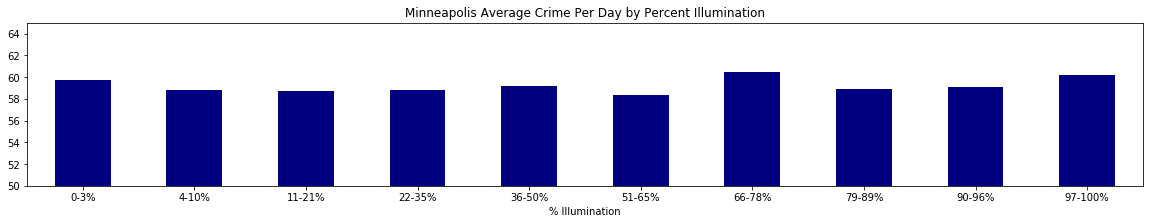

In [64]:
# Use DataFrame.plot() in order to create a bar chart of the data
mpls_summary_new.plot(kind="bar", figsize=(20,3), 
                      title='Minneapolis Average Crime Per Day by Percent Illumination', 
                      legend=False, ylim=(50, 65), rot=0, colormap = 'gist_ncar')

# Save plot
plt.savefig("images/mpls_avgcrime_percillum.png")

# Show plot
plt.show()

In [65]:
# Save summary data to csv
# mpls_summary.to_csv("mpls_summary.csv")

In [66]:
# Calculate average crime per day
mpls_daily_avg_crime = mpls_crime_total_rename['Total Crimes'].mean()
print(f"Average number of rows = {mpls_daily_avg_crime}")

# Print daily summary data frame
mpls_crime_total_rename

Average number of rows = 56.534671532846716


,Total Crimes
Date,
2015-07-25,95
2016-10-16,92
2016-08-12,92
2015-08-16,91
2016-10-15,91
2017-06-21,91
2017-06-25,89
2016-08-01,89
2015-01-16,87


In [67]:
# Perform t-test on total data, Result is p-Value = 1
stats.ttest_1samp(mpls_crime_total_rename['Total Crimes'], mpls_daily_avg_crime)

Ttest_1sampResult(statistic=0.0, pvalue=1.0)

In [68]:
# Create a daily data frame for total crimes including moon data
mpls_daily_crime_by_moon = pd.merge(mpls_crime_total_rename, moon_data, how="left", on = 'Date')
mpls_daily_crime_by_moon['Percent Illumination'] = mpls_daily_crime_by_moon['Percent Illumination'].str.rstrip('%').astype('float')
print(f"Number of rows = {len(mpls_daily_crime_by_moon)}")
mpls_daily_crime_by_moon = mpls_daily_crime_by_moon.drop(['Year', 'Month', 'Day', 'Moon Phase'], axis = 1)

# Save summary data to csv
mpls_daily_crime_by_moon.to_csv("csv_files/mpls_summary.csv")

mpls_daily_crime_by_moon

Number of rows = 1096


,Date,Total Crimes,Percent Illumination
0,2015-07-25,95,61.0
1,2016-10-16,92,100.0
2,2016-08-12,92,64.0
3,2015-08-16,91,2.0
4,2016-10-15,91,99.0
5,2017-06-21,91,13.0
6,2017-06-25,89,2.0
7,2016-08-01,89,3.0
8,2015-01-16,87,23.0
9,2017-07-24,87,1.0


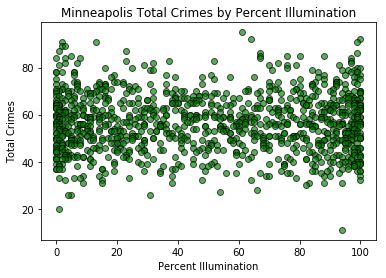

In [69]:
# Scatter plots for total crimes by percent illumination
plt.scatter(mpls_daily_crime_by_moon['Percent Illumination'], mpls_daily_crime_by_moon['Total Crimes'],
           marker ='o', color = 'green', edgecolors='black', alpha = 0.65, linewidth = 1)
plt.title('Minneapolis Total Crimes by Percent Illumination')
plt.xlabel('Percent Illumination')
plt.ylabel('Total Crimes')

# Save plot
plt.savefig("images/mpls_total_crimes_scatter.png")

# Show plot
plt.show()

In [70]:
mpls_full_moon = mpls_daily_crime_by_moon.loc[mpls_daily_crime_by_moon['Percent Illumination'] >= 97.0, :]
mpls_full_moon_average = mpls_full_moon['Total Crimes'].mean()
print(f"Average daily crimes during full moon = {mpls_full_moon_average}")

mpls_full_moon

Average daily crimes during full moon = 57.32283464566929


,Date,Total Crimes,Percent Illumination
1,2016-10-16,92,100.0
4,2016-10-15,91,99.0
11,2016-08-19,86,99.0
19,2016-09-18,84,97.0
23,2016-09-15,83,97.0
26,2017-10-07,82,97.0
38,2016-04-23,80,99.0
41,2017-06-09,80,100.0
45,2017-06-08,79,98.0
50,2015-11-25,78,99.0


In [71]:
# Perform t-test for days that full on or near the full moon
mpls_stats, mpls_pvalue = stats.ttest_1samp(mpls_full_moon['Total Crimes'], mpls_daily_avg_crime)
print(mpls_stats)
print(f"Minneapolis p-Value = {mpls_pvalue}")

0.6623024846195658
Minneapolis p-Value = 0.5089869744724294


In [72]:
# Add new column to display the illumination range for each date
mpls_daily_crime_by_moon['% Illumination'] = pd.cut(mpls_daily_crime_by_moon['Percent Illumination'], 
                                      bins, 
                                      labels = group_name, 
                                      include_lowest=True)
print(f"Number of rows = {len(mpls_daily_crime_by_moon)}")

mpls_daily_crime_by_moon.head()

Number of rows = 1096


,Date,Total Crimes,Percent Illumination,% Illumination
0,2015-07-25,95,61.0,51-65%
1,2016-10-16,92,100.0,97-100%
2,2016-08-12,92,64.0,51-65%
3,2015-08-16,91,2.0,0-3%
4,2016-10-15,91,99.0,97-100%


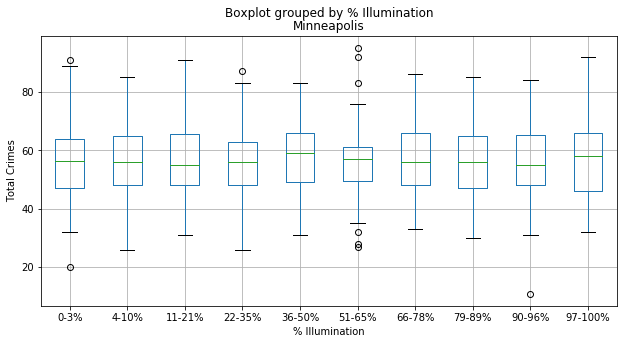

In [73]:
# Create a boxplot to compare means
mpls_daily_crime_by_moon.boxplot("Total Crimes", by="% Illumination", figsize=(10, 5))
plt.title('Minneapolis')
plt.ylabel('Total Crimes')

# Save plot
plt.savefig("images/mpls_total_crimes_boxplot.png")

# Show plot
plt.show()

In [74]:
# Extract individual groups for each illumination range
group1 = mpls_daily_crime_by_moon[mpls_daily_crime_by_moon["% Illumination"] == "0-3%"]["Total Crimes"]
group2 = mpls_daily_crime_by_moon[mpls_daily_crime_by_moon["% Illumination"] == "4-10%"]["Total Crimes"]
group3 = mpls_daily_crime_by_moon[mpls_daily_crime_by_moon["% Illumination"] == "11-21%"]["Total Crimes"]
group4 = mpls_daily_crime_by_moon[mpls_daily_crime_by_moon["% Illumination"] == "22-35%"]["Total Crimes"]
group5 = mpls_daily_crime_by_moon[mpls_daily_crime_by_moon["% Illumination"] == "36-50%"]["Total Crimes"]
group6 = mpls_daily_crime_by_moon[mpls_daily_crime_by_moon["% Illumination"] == "51-65%"]["Total Crimes"]
group7 = mpls_daily_crime_by_moon[mpls_daily_crime_by_moon["% Illumination"] == "66-78%"]["Total Crimes"]
group8 = mpls_daily_crime_by_moon[mpls_daily_crime_by_moon["% Illumination"] == "79-89%"]["Total Crimes"]
group9 = mpls_daily_crime_by_moon[mpls_daily_crime_by_moon["% Illumination"] == "90-96%"]["Total Crimes"]
group10 = mpls_daily_crime_by_moon[mpls_daily_crime_by_moon["% Illumination"] == "97-100%"]["Total Crimes"]

In [75]:
# Perform the ANOVA
stats.f_oneway(group1, group2, group3, group4, group5, group6, group7, group8, group9, group10)

F_onewayResult(statistic=0.19835208994437145, pvalue=0.9943765373197161)

# Portland Crime Data Munging

In [76]:
portlanddata = "csv_files/portlandcrime.csv"
portlandcrimedf = pd.read_csv(portlanddata, low_memory=False)
portlandcrimedf.head()

,Address,Case Number,Crime Against,Neighborhood,Number of Records,Occur Date,Occur Month Year,Occur Time,Offense Category,Offense Count,Offense Type,OpenDataLat,OpenDataLon,OpenDataX,OpenDataY,Report Date,ReportMonthYear
0,8400 BLOCK OF SE LAMBERT ST,15-159999,Property,Lents,1,1/1/2015,1/1/2015,1220,Larceny Offenses,1,Theft From Building,45.466868,-122.576147,7669522.0,663149.0,5/15/2015,May-15
1,1200 BLOCK OF SW COLUMBIA ST,15-384156,Property,Downtown,1,1/1/2015,1/1/2015,1200,Fraud Offenses,1,Identity Theft,45.515990,-122.687212,7641523.0,681804.0,11/5/2015,Nov-15
2,NaN,15-X4450445,Property,Hazelwood,1,1/1/2015,1/1/2015,1,Fraud Offenses,1,Identity Theft,NaN,NaN,NaN,NaN,11/30/2015,Nov-15
3,NaN,18-X5023636,Person,Mill Park,1,1/1/2015,1/1/2015,0,Assault Offenses,1,Aggravated Assault,NaN,NaN,NaN,NaN,1/24/2018,Jan-18
4,3200 BLOCK OF NE 73RD AVE,15-267913,Property,Roseway,1,1/1/2015,1/1/2015,800,Burglary,1,Burglary,45.545949,-122.587994,7667229.0,692051.0,8/6/2015,Aug-15


In [77]:
moondata = "csv_files/moonphasedata.csv"
moondf = pd.read_csv(moondata)
moondf.head()

,Year,Day,Month,Full Date,Percent Illumination,Moon Phase
0,2015,1,1,1/1/2015,84.00%,Waxing gibbous
1,2015,2,1,1/2/2015,91.00%,Waxing gibbous
2,2015,3,1,1/3/2015,96.00%,Waxing gibbous
3,2015,4,1,1/4/2015,99.00%,Waxing gibbous
4,2015,5,1,1/5/2015,100.00%,Full Moon


In [78]:
mergedf = pd.merge(moondf, portlandcrimedf, how="outer", left_on='Full Date', right_on='Occur Date')
mergedf.head()

,Year,Day,Month,Full Date,Percent Illumination,Moon Phase,Address,Case Number,Crime Against,Neighborhood,...,Occur Time,Offense Category,Offense Count,Offense Type,OpenDataLat,OpenDataLon,OpenDataX,OpenDataY,Report Date,ReportMonthYear
0,2015,1,1,1/1/2015,84.00%,Waxing gibbous,8400 BLOCK OF SE LAMBERT ST,15-159999,Property,Lents,...,1220.0,Larceny Offenses,1.0,Theft From Building,45.466868,-122.576147,7669522.0,663149.0,5/15/2015,May-15
1,2015,1,1,1/1/2015,84.00%,Waxing gibbous,1200 BLOCK OF SW COLUMBIA ST,15-384156,Property,Downtown,...,1200.0,Fraud Offenses,1.0,Identity Theft,45.515990,-122.687212,7641523.0,681804.0,11/5/2015,Nov-15
2,2015,1,1,1/1/2015,84.00%,Waxing gibbous,NaN,15-X4450445,Property,Hazelwood,...,1.0,Fraud Offenses,1.0,Identity Theft,NaN,NaN,NaN,NaN,11/30/2015,Nov-15
3,2015,1,1,1/1/2015,84.00%,Waxing gibbous,NaN,18-X5023636,Person,Mill Park,...,0.0,Assault Offenses,1.0,Aggravated Assault,NaN,NaN,NaN,NaN,1/24/2018,Jan-18
4,2015,1,1,1/1/2015,84.00%,Waxing gibbous,3200 BLOCK OF NE 73RD AVE,15-267913,Property,Roseway,...,800.0,Burglary,1.0,Burglary,45.545949,-122.587994,7667229.0,692051.0,8/6/2015,Aug-15


In [79]:
moondf.rename(columns = {'Full Date':'Date'}, inplace = True)

In [80]:
mergedf.columns

Index(['Year', 'Day', 'Month', 'Full Date', 'Percent Illumination',
       'Moon Phase', 'Address', 'Case Number', 'Crime Against', 'Neighborhood',
       'Number of Records', 'Occur Date', 'Occur Month Year', 'Occur Time',
       'Offense Category', 'Offense Count', 'Offense Type', 'OpenDataLat',
       'OpenDataLon', 'OpenDataX', 'OpenDataY', 'Report Date',
       'ReportMonthYear'],
      dtype='object')

In [81]:
mergedfclean = mergedf
mergedfclean.drop(labels=['Case Number', 'Crime Against', 'Number of Records', 
                          'Occur Month Year', 'Offense Count', 'Offense Type', 'OpenDataX', 
                          'OpenDataY', 'Report Date', 'Year', 'Day', 'Month', 'ReportMonthYear'], 
                  axis=1, inplace=True)
mergedfclean

,Full Date,Percent Illumination,Moon Phase,Address,Neighborhood,Occur Date,Occur Time,Offense Category,OpenDataLat,OpenDataLon
0,1/1/2015,84.00%,Waxing gibbous,8400 BLOCK OF SE LAMBERT ST,Lents,1/1/2015,1220.0,Larceny Offenses,45.466868,-122.576147
1,1/1/2015,84.00%,Waxing gibbous,1200 BLOCK OF SW COLUMBIA ST,Downtown,1/1/2015,1200.0,Fraud Offenses,45.515990,-122.687212
2,1/1/2015,84.00%,Waxing gibbous,NaN,Hazelwood,1/1/2015,1.0,Fraud Offenses,NaN,NaN
3,1/1/2015,84.00%,Waxing gibbous,NaN,Mill Park,1/1/2015,0.0,Assault Offenses,NaN,NaN
4,1/1/2015,84.00%,Waxing gibbous,3200 BLOCK OF NE 73RD AVE,Roseway,1/1/2015,800.0,Burglary,45.545949,-122.587994
5,1/1/2015,84.00%,Waxing gibbous,5700 BLOCK OF N SYRACUSE ST,University Park,1/1/2015,0.0,Fraud Offenses,45.580738,-122.729461
6,1/1/2015,84.00%,Waxing gibbous,NaN,Pearl,1/1/2015,800.0,Fraud Offenses,NaN,NaN
7,1/1/2015,84.00%,Waxing gibbous,3700 BLOCK OF SE 10TH AVE,Brooklyn,1/1/2015,1.0,Fraud Offenses,45.495667,-122.655891
8,1/1/2015,84.00%,Waxing gibbous,NaN,Humboldt,1/1/2015,1.0,Assault Offenses,NaN,NaN
9,1/1/2015,84.00%,Waxing gibbous,100 BLOCK OF NW 20TH PL,Northwest,1/1/2015,1.0,Larceny Offenses,45.524034,-122.693272


In [82]:
# Change date formatting
mergedfclean['Full Date'] = mergedfclean['Full Date'].apply(lambda x : dt.datetime.strptime(x, '%m/%d/%Y'))
mergedfclean

,Full Date,Percent Illumination,Moon Phase,Address,Neighborhood,Occur Date,Occur Time,Offense Category,OpenDataLat,OpenDataLon
0,2015-01-01,84.00%,Waxing gibbous,8400 BLOCK OF SE LAMBERT ST,Lents,1/1/2015,1220.0,Larceny Offenses,45.466868,-122.576147
1,2015-01-01,84.00%,Waxing gibbous,1200 BLOCK OF SW COLUMBIA ST,Downtown,1/1/2015,1200.0,Fraud Offenses,45.515990,-122.687212
2,2015-01-01,84.00%,Waxing gibbous,NaN,Hazelwood,1/1/2015,1.0,Fraud Offenses,NaN,NaN
3,2015-01-01,84.00%,Waxing gibbous,NaN,Mill Park,1/1/2015,0.0,Assault Offenses,NaN,NaN
4,2015-01-01,84.00%,Waxing gibbous,3200 BLOCK OF NE 73RD AVE,Roseway,1/1/2015,800.0,Burglary,45.545949,-122.587994
5,2015-01-01,84.00%,Waxing gibbous,5700 BLOCK OF N SYRACUSE ST,University Park,1/1/2015,0.0,Fraud Offenses,45.580738,-122.729461
6,2015-01-01,84.00%,Waxing gibbous,NaN,Pearl,1/1/2015,800.0,Fraud Offenses,NaN,NaN
7,2015-01-01,84.00%,Waxing gibbous,3700 BLOCK OF SE 10TH AVE,Brooklyn,1/1/2015,1.0,Fraud Offenses,45.495667,-122.655891
8,2015-01-01,84.00%,Waxing gibbous,NaN,Humboldt,1/1/2015,1.0,Assault Offenses,NaN,NaN
9,2015-01-01,84.00%,Waxing gibbous,100 BLOCK OF NW 20TH PL,Northwest,1/1/2015,1.0,Larceny Offenses,45.524034,-122.693272


In [83]:
#Create an overview table that summarizes key metrics about each date, including: 

# Total crime by date
portlandcrimetotal = pd.DataFrame(mergedfclean['Full Date'].value_counts())

# Rename Date column to Total Crimes
portlandcrimetotalrename = portlandcrimetotal.rename(columns={'Full Date': 'Total Crimes'})

# Add index title for Total Crime
portlandcrimetotalrename.index.name = 'Full Date'

# Merge crime counts with previous total data frame
portlandcrimetot = mergedfclean.merge(portlandcrimetotalrename, how='outer', 
                                      on='Full Date').drop(['Occur Time', 'Occur Date', 
                                                            'Address', 'Offense Category', 'OpenDataLat', 
                                                            'OpenDataLon', 'Moon Phase', 'Neighborhood'], axis=1)

# Remove duplicate dates/condense
portlandcrimetotrm = portlandcrimetot.drop_duplicates()

# Sort data frame by date
portlandbydate = portlandcrimetotrm.sort_values(by='Full Date')

# Reset index values
portlandsummary = portlandbydate.reset_index(drop=True)

portlandsummary

,Full Date,Percent Illumination,Total Crimes
0,2015-01-01,84.00%,44
1,2015-01-02,91.00%,1
2,2015-01-03,96.00%,1
3,2015-01-04,99.00%,3
4,2015-01-05,100.00%,3
5,2015-01-06,99.00%,3
6,2015-01-07,96.00%,2
7,2015-01-08,91.00%,1
8,2015-01-09,85.00%,1
9,2015-01-10,78.00%,1


In [84]:
portlandsummary['Percent Illumination'] = portlandsummary['Percent Illumination'].str.rstrip('%').astype('float')

In [85]:
# Create percent illumination bins
bins = [0, 3, 10, 21.5, 35.5, 51, 66, 79, 90, 97, 100]
group_name = ['0-2%', '3-9%', '10-21%', '21-35%', '36-50%', '51-65%', '66-78%', '79-89%', '90-96%', '97-100%']
portlandsummary['% Illumination'] = pd.cut(portlandsummary['Percent Illumination'], 
                                           bins, labels = group_name, include_lowest=True)

# Group the merged data by percent illumination spending
by_illumination = portlandsummary.groupby('% Illumination')

# Calculate average crime
avg_crime = by_illumination['Total Crimes'].mean()

# Store illumination bins in a dataframe            
portlandsummarynew = pd.DataFrame({'Average Crime': avg_crime})

portlandsummarynew

,Average Crime
% Illumination,
0-2%,145.820312
3-9%,145.914894
10-21%,144.196262
21-35%,143.587156
36-50%,145.119658
51-65%,140.822430
66-78%,141.084906
79-89%,146.054054
90-96%,138.629630


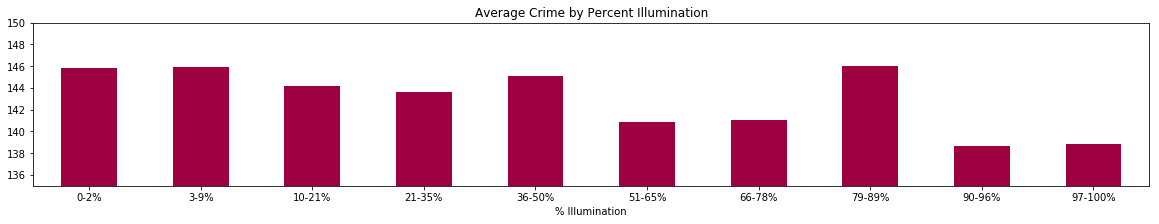

In [86]:
# Use DataFrame.plot() in order to create a bar chart of the data
portlandsummarynew.plot(kind="bar", figsize=(20,3), title='Average Crime by Percent Illumination', legend=False, 
                    ylim=(135, 150), rot=0, colormap = 'Spectral')

# Save plot
plt.savefig("images/portlandaveragecrime.png")

# Show plot
plt.show()

In [87]:
# Export data to csv
portlandsummary.to_csv('csv_files/portlanddata.csv')

In [88]:
# Calculate average crime
portlandcrimetotal = portlandcrimetotalrename['Total Crimes'].mean()
print(portlandcrimetotal)

# Print daily summary data frame
portlandcrimetotalrename

143.04835766423358


,Total Crimes
Full Date,
2016-11-10,285
2015-10-31,232
2017-12-01,228
2016-07-01,227
2017-09-01,222
2017-02-28,219
2017-05-01,216
2015-11-21,215
2017-12-15,213


In [89]:
stats.ttest_1samp(portlandcrimetotalrename['Total Crimes'],portlandcrimetotal)

Ttest_1sampResult(statistic=0.0, pvalue=1.0)

In [90]:
portlandfullmoon = portlandsummary.loc[portlandsummary['Percent Illumination'] >= 97.0, :]
portlandfullmoon.drop(['% Illumination'], axis=1)

,Full Date,Percent Illumination,Total Crimes
3,2015-01-04,99.0,3
4,2015-01-05,100.0,3
5,2015-01-06,99.0,3
32,2015-02-02,97.0,4
33,2015-02-03,99.0,1
34,2015-02-04,100.0,1
35,2015-02-05,98.0,3
62,2015-03-04,98.0,4
63,2015-03-05,100.0,3
64,2015-03-06,100.0,5


In [91]:
stats.ttest_1samp(portlandfullmoon['Total Crimes'], portlandcrimetotal)

Ttest_1sampResult(statistic=-0.7608315710084188, pvalue=0.4481791672164058)

In [92]:
# New bins for groups
group_name2 = ['0-2', '3-9', '10-21', '21-35', '36-50', '51-65', '66-78', '79-89', '90-96', '97-100']
portlandsummary['% Illumination'] = pd.cut(portlandsummary['Percent Illumination'], 
                                      bins, 
                                      labels = group_name2, 
                                      include_lowest=True)
# Get total of data
print(len(portlandsummary))
# Display Data Frame
portlandsummary.head()

1096


,Full Date,Percent Illumination,Total Crimes,% Illumination
0,2015-01-01,84.0,44,79-89
1,2015-01-02,91.0,1,90-96
2,2015-01-03,96.0,1,90-96
3,2015-01-04,99.0,3,97-100
4,2015-01-05,100.0,3,97-100


In [93]:
# Extract individual groups
group1 = portlandsummary[portlandsummary["% Illumination"] == "0-2"]["Total Crimes"]
group2 = portlandsummary[portlandsummary["% Illumination"] == "3-9"]["Total Crimes"]
group3 = portlandsummary[portlandsummary["% Illumination"] == "10-21"]["Total Crimes"]
group4 = portlandsummary[portlandsummary["% Illumination"] == "21-35"]["Total Crimes"]
group5 = portlandsummary[portlandsummary["% Illumination"] == "36-50"]["Total Crimes"]
group6 = portlandsummary[portlandsummary["% Illumination"] == "51-65"]["Total Crimes"]
group7 = portlandsummary[portlandsummary["% Illumination"] == "66-78"]["Total Crimes"]
group8 = portlandsummary[portlandsummary["% Illumination"] == "79-89"]["Total Crimes"]
group9 = portlandsummary[portlandsummary["% Illumination"] == "90-96"]["Total Crimes"]
group10 = portlandsummary[portlandsummary["% Illumination"] == "97-100"]["Total Crimes"]

In [94]:
# Perform the ANOVA
stats.f_oneway(group1, group2, group3, group4, group5, group6, group7, group8, group9, group10)

F_onewayResult(statistic=0.3424071177559582, pvalue=0.9607368069727593)

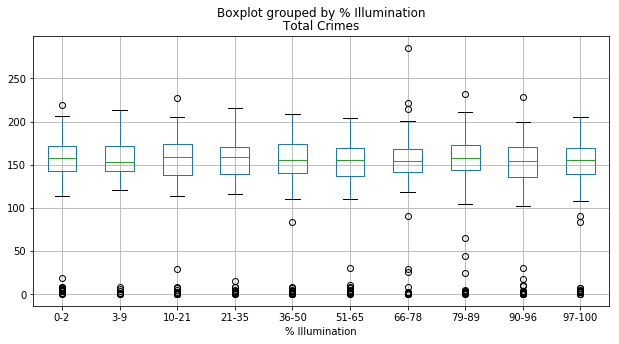

In [95]:
# Create a boxplot to compare means
portlandsummary.boxplot('Total Crimes', by='% Illumination', figsize=(10, 5))
# Save plot
plt.savefig("images/portland_total_crimes_box.png")
plt.show()

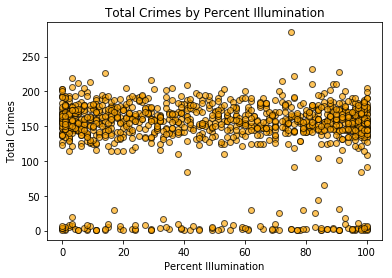

In [96]:
# Scatter plots for total crimes by percent illumination
plt.scatter(portlandsummary['Percent Illumination'], portlandsummary['Total Crimes'],
           marker ='o', color = 'orange', edgecolors='black', alpha = 0.65, linewidth = 1)
plt.title('Total Crimes by Percent Illumination')
plt.xlabel('Percent Illumination')
plt.ylabel('Total Crimes')
# Save plot
plt.savefig("images/portland_total_crimes_scatter.png")
plt.show()

# Denver Crime Data Munging